<a href="https://colab.research.google.com/github/Forkyknight/single_object_detection_yolov3/blob/main/trained%2Bpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Dec 11 18:10:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
# Compile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 500/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
!echo "gas_cylinder" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/drive/MyDrive/yolov3' > data/obj.data
!mkdir data/obj

mkdir: cannot create directory ‘data/obj’: File exists


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-12-11 18:11:33--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M   766KB/s    in 3m 12s  

2020-12-11 18:14:46 (825 KB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
!unzip /content/drive/MyDrive/yolov3/images.zip -d data/obj

Archive:  /content/drive/MyDrive/yolov3/images.zip
  inflating: data/obj/1.jpg          
  inflating: data/obj/1.txt          
  inflating: data/obj/2.jpg          
  inflating: data/obj/2.txt          
  inflating: data/obj/3.jpg          
  inflating: data/obj/3.txt          
  inflating: data/obj/4.jpg          
  inflating: data/obj/4.txt          
  inflating: data/obj/4t65464.jpg    
  inflating: data/obj/4t65464.txt    
  inflating: data/obj/5.jpg          
  inflating: data/obj/5.txt          
  inflating: data/obj/6.jpg          
  inflating: data/obj/6.txt          
  inflating: data/obj/7.jpg          
  inflating: data/obj/7.txt          
  inflating: data/obj/8.jpg          
  inflating: data/obj/8.txt          
  inflating: data/obj/12.jpg         
  inflating: data/obj/12.txt         
  inflating: data/obj/15.jpg         
  inflating: data/obj/15.txt         
  inflating: data/obj/17.jpg         
  inflating: data/obj/17.txt         
  inflating: data/obj/18.jpg         

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

0 0.515444 0.502577 0.274131 0.974227

['0', '0.515444', '0.502577', '0.274131', '0.974227']
0 data/obj/98.txt
0 0.515444 0.502577 0.274131 0.974227
0 0.513889 0.508929 0.883333 0.982143

['0', '0.513889', '0.508929', '0.883333', '0.982143']
1 data/obj/77.txt
0 0.513889 0.508929 0.883333 0.982143
0 0.175439 0.601695 0.280702 0.706215

['0', '0.175439', '0.601695', '0.280702', '0.706215']
2 data/obj/987y.txt
0 0.175439 0.601695 0.280702 0.706215
0 0.489474 0.646893 0.235088 0.694915

['0', '0.489474', '0.646893', '0.235088', '0.694915']
2 data/obj/987y.txt
0 0.489474 0.646893 0.235088 0.694915
0 0.821053 0.638418 0.259649 0.723164

['0', '0.821053', '0.638418', '0.259649', '0.723164']
2 data/obj/987y.txt
0 0.821053 0.638418 0.259649 0.723164
0 0.493548 0.450617 0.935484 0.888889

['0', '0.493548', '0.450617', '0.935484', '0.888889']
3 data/obj/80.txt
0 0.493548 0.450617 0.935484 0.888889
0 0.379032 0.709360 0.217742 0.423645

['0', '0.379032', '0.709360', '0.217742', '0.423645']
4 data/

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

['data/obj/78.jpg', 'data/obj/63.jpg', 'data/obj/38.jpg', 'data/obj/477.jpg', 'data/obj/111.jpg', 'data/obj/73.jpg', 'data/obj/rsgdtexrt.jpg', 'data/obj/67679.jpg', 'data/obj/7.jpg', 'data/obj/76666666666666666.jpg', 'data/obj/42.jpg', 'data/obj/65.jpg', 'data/obj/5.jpg', 'data/obj/98080.jpg', 'data/obj/21.jpg', 'data/obj/75.jpg', 'data/obj/724551.jpg', 'data/obj/ghcfjhy.jpg', 'data/obj/124.jpg', 'data/obj/19.jpg', 'data/obj/91.jpg', 'data/obj/75945.jpg', 'data/obj/71213595.jpg', 'data/obj/118.jpg', 'data/obj/201346.jpg', 'data/obj/84.jpg', 'data/obj/7491638520.jpg', 'data/obj/128.jpg', 'data/obj/57.jpg', 'data/obj/89087.jpg', 'data/obj/64.jpg', 'data/obj/52.jpg', 'data/obj/18.jpg', 'data/obj/126.jpg', 'data/obj/112.jpg', 'data/obj/2435.jpg', 'data/obj/hjygjt.jpg', 'data/obj/44.jpg', 'data/obj/fgtjgfcju.jpg', 'data/obj/013126454978.jpg', 'data/obj/94.jpg', 'data/obj/879435.jpg', 'data/obj/765.jpg', 'data/obj/6.jpg', 'data/obj/87.jpg', 'data/obj/99.jpg', 'data/obj/17.jpg', 'data/obj/96.

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.001382, iou_loss = 0.000000, total_loss = 0.001382 
 total_bbox = 54912, rewritten_bbox = 0.000000 % 

 426: 1.637398, 1.585630 avg loss, 0.000033 rate, 9.502715 seconds, 27264 images, 0.305243 hours left
Loaded: 0.000056 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.428423), count: 8, class_loss = 1.795678, iou_loss = 3.315877, total_loss = 5.111555 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.350232), count: 2, class_loss = 0.513864, iou_loss = 1.365167, total_loss = 1.879031 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.001210, iou_loss = 0.000000, total_loss = 0.001210 
 total_bbox = 54922, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00

In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow

In [ ]:
# Load Yolo
net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3/yolov3_training_last.weights", "/content/darknet/cfg/yolov3_testing.cfg")

In [ ]:

def pred(path):
  # Name custom object
  classes = ["gascyl"]

  # Images path
  images_path = glob.glob(path)



  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  colors = np.random.uniform(0, 255, size=(len(classes), 3))

  # Insert here the path of your images
  random.shuffle(images_path)
  # loop through all the images
  for img_path in images_path:
      # Loading image
      img = cv2.imread(img_path)
      img = cv2.resize(img, None, fx=0.4, fy=0.4)
      height, width, channels = img.shape

      # Detecting objects
      blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

      net.setInput(blob)
      outs = net.forward(output_layers)

      # Showing informations on the screen
      class_ids = []
      confidences = []
      boxes = []
      for out in outs:
          for detection in out:
              scores = detection[5:]
              class_id = np.argmax(scores)
              confidence = scores[class_id]
              if confidence > 0.3:
                  # Object detected
                  print(class_id)
                  center_x = int(detection[0] * width)
                  center_y = int(detection[1] * height)
                  w = int(detection[2] * width)
                  h = int(detection[3] * height)

                  # Rectangle coordinates
                  x = int(center_x - w / 2)
                  y = int(center_y - h / 2)

                  boxes.append([x, y, w, h])
                  confidences.append(float(confidence))
                  class_ids.append(class_id)

      indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
      print(indexes)
      font = cv2.FONT_HERSHEY_PLAIN
      for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              color = colors[class_ids[i]]
              cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
              cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


      cv2_imshow(img)

0
0
[[0]]


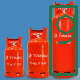

In [ ]:
pred("/content/drive/MyDrive/object det proj/pics/8275822.jpg")

In [ ]:


phot=os.listdir("/content/drive/MyDrive/object det proj/test")

In [ ]:
for pic in phot:
  pred("/content/drive/MyDrive/object det proj/test/")+pic

error: ignored

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_testing.cfg /content/drive/MyDrive/yolov3/yolov3_training_last.weights /content/WhatsApp Image 2020-12-12 at 1.24.14 AM.jpeg -thresh 0.3
#cv2_imshow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B